In [88]:
# Importing the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [89]:
# Loading the data
df = pd.read_csv('walmart-sales-dataset-of-45stores.csv')

In [90]:
# Converting Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [91]:
# Data overviewing
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-

### DATA VISUALIZATION - EXTRACTING THE HIDDEN INSIGHTS FROM THE DATA

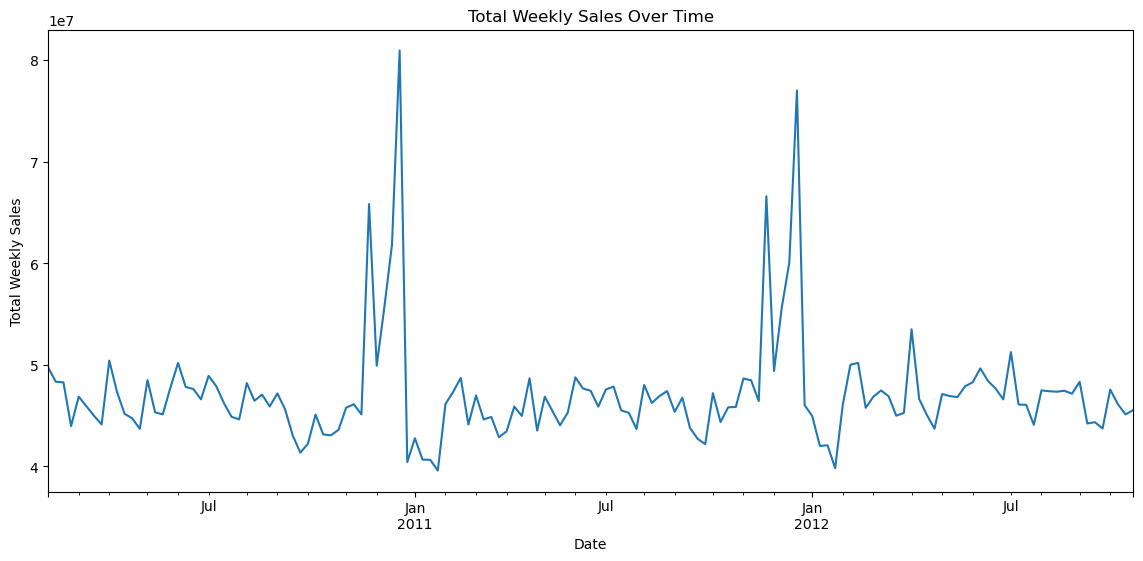

In [92]:
# 1. Sales Trend Over Time 
plt.figure(figsize=(14,6))
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()
weekly_sales.plot()
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Total Weekly Sales')
plt.xlabel('Date')
plt.show()


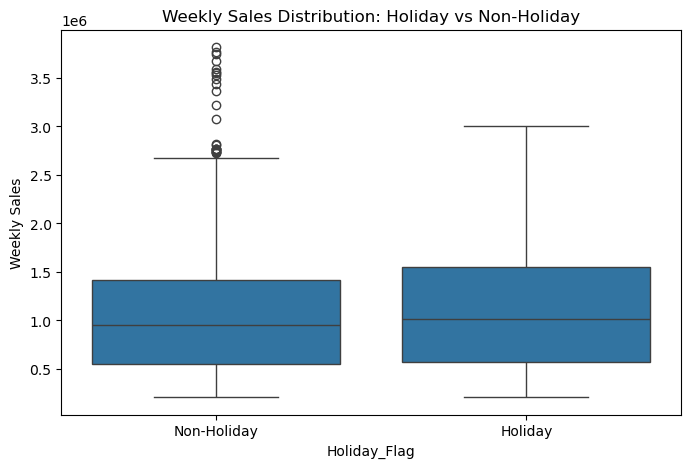

In [93]:
# 2. Holiday vs Non-Holiday Weekly Sales Distribution 
plt.figure(figsize=(8,5))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday')
plt.ylabel('Weekly Sales')
plt.show()

In [94]:
# Calculating the percent increase in holiday sales
holiday_sales_avg = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
non_holiday_sales_avg = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
pct_increase = ((holiday_sales_avg - non_holiday_sales_avg) / non_holiday_sales_avg) * 100
print(f"Weekly sales increased by {pct_increase:.2f}% during holiday weeks.")


Weekly sales increased by 7.84% during holiday weeks.


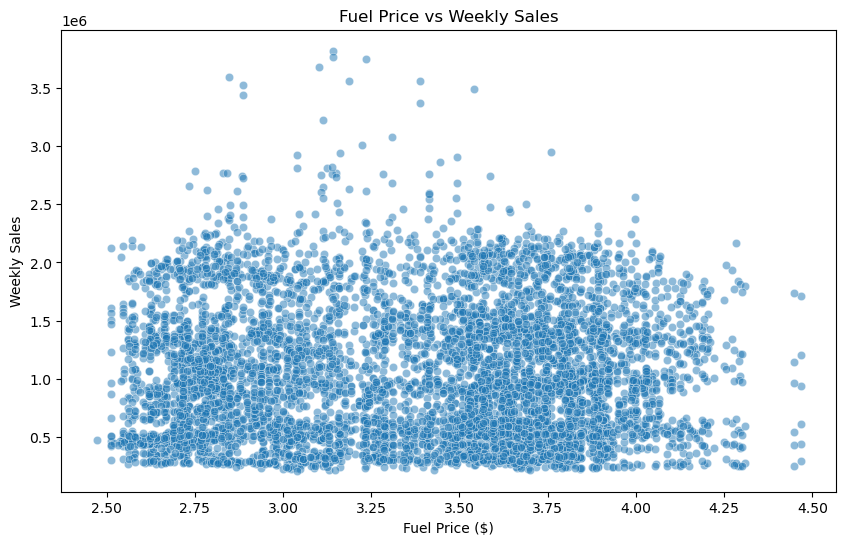

Correlation between Fuel Price and Weekly Sales: 0.01


In [95]:
# 3. Relationship Between Fuel Price and Weekly Sales 
plt.figure(figsize=(10,6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, alpha=0.5)
plt.title('Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price ($)')
plt.ylabel('Weekly Sales')
plt.show()


corr_fuel_sales = df[['Fuel_Price', 'Weekly_Sales']].corr().iloc[0,1]
print(f"Correlation between Fuel Price and Weekly Sales: {corr_fuel_sales:.2f}")

In [96]:
# 4. Store-wise Average Sales and Temperature 
store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
store_temp = df.groupby('Store')['Temperature'].mean().reset_index()
store_info = pd.merge(store_sales, store_temp, on='Store').rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales', 'Temperature': 'Avg_Temperature'})


In [97]:
# 5. Analyzing Top and Bottom Performing Stores Based on Average Sales & Temperature

# Sorting stores by Avg_Weekly_Sales
store_info_sorted = store_info.sort_values('Avg_Weekly_Sales', ascending=False)

# Getting top 10 and bottom 10 stores
top_10_stores = store_info_sorted.head(10)
bottom_10_stores = store_info_sorted.tail(10)

# Average temperature difference
top_avg_temp = top_10_stores['Avg_Temperature'].mean()
bottom_avg_temp = bottom_10_stores['Avg_Temperature'].mean()
temp_diff = bottom_avg_temp - top_avg_temp

print(f"Top 10 stores average temperature: {top_avg_temp:.2f}")
print(f"Bottom 10 stores average temperature: {bottom_avg_temp:.2f}")
print(f"Temperature difference between top and bottom stores: {temp_diff:.2f}")

Top 10 stores average temperature: 63.56
Bottom 10 stores average temperature: 65.26
Temperature difference between top and bottom stores: 1.71


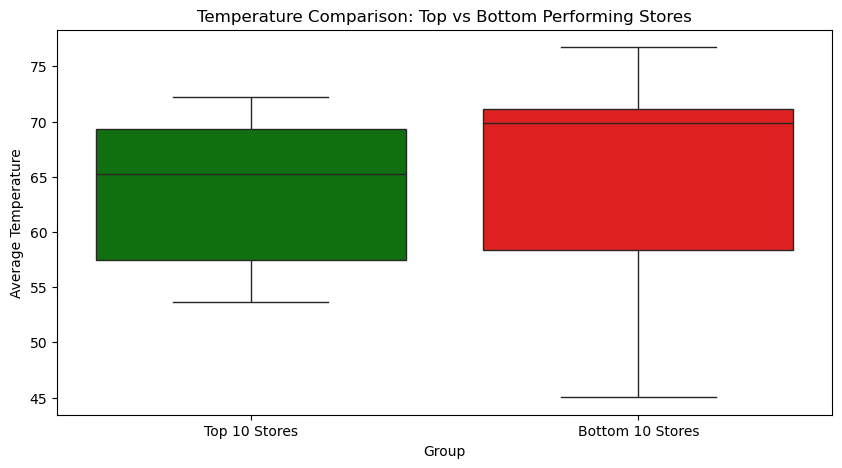

In [98]:
# 6. Temperature Comparison for Top vs Bottom Stores
temp_compare = pd.concat([
    pd.DataFrame({'Temperature': top_10_stores['Avg_Temperature'], 'Group': 'Top 10 Stores'}),
    pd.DataFrame({'Temperature': bottom_10_stores['Avg_Temperature'], 'Group': 'Bottom 10 Stores'})
])

plt.figure(figsize=(10,5))
sns.boxplot(x='Group', y='Temperature', data=temp_compare, 
            hue='Group', palette=['green', 'red'], legend=False)
plt.title('Temperature Comparison: Top vs Bottom Performing Stores')
plt.ylabel('Average Temperature')
plt.show()

In [99]:
# 7. Sales Increase During Holiday Weeks by Store

# Calculating the average sales for each store during holiday and non-holiday weeks
store_sales_holiday = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().unstack()

# Calculating percentage increase per store during holiday weeks
store_sales_holiday['Pct_Holiday_Increase'] = ((store_sales_holiday[1] - store_sales_holiday[0]) / store_sales_holiday[0]) * 100

# Sorting by percentage increase descending
store_sales_holiday_sorted = store_sales_holiday.sort_values('Pct_Holiday_Increase', ascending=False)


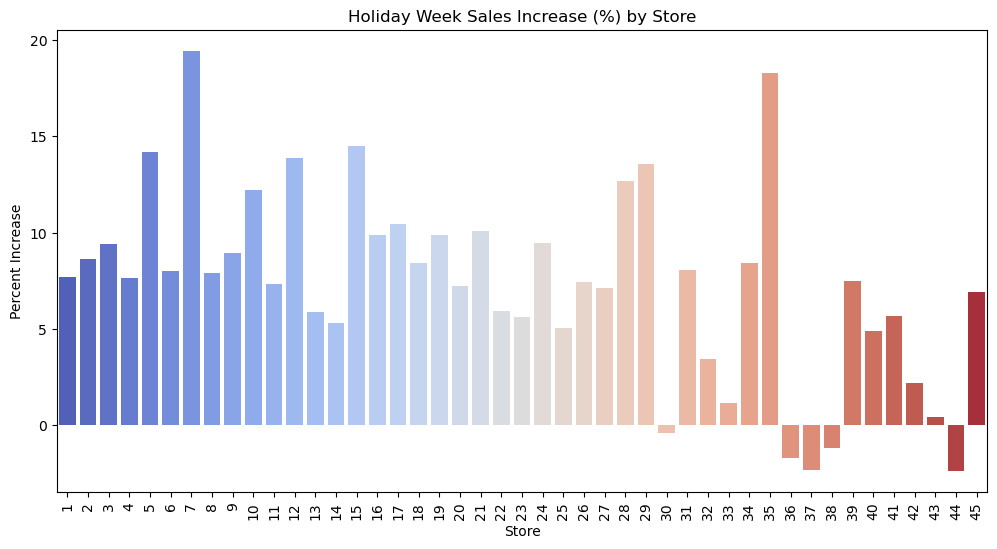

In [100]:
# Visualizing percentage increase for each store
plt.figure(figsize=(12,6))
sns.barplot(x=store_sales_holiday_sorted.index, y='Pct_Holiday_Increase', data=store_sales_holiday_sorted, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Holiday Week Sales Increase (%) by Store')
plt.ylabel('Percent Increase')
plt.xlabel('Store')
plt.show()

### Summary of The Hidden Insights From the Data
#### 1. Holiday Impact: Weekly sales increased by ~{pct_increase:.2f}% during holiday weeks, showing a strong seasonal effect.

#### 2. Fuel Price Correlation: There is a positive correlation ({corr_fuel_sales:.2f}) between fuel price and weekly sales, 
#### possibly indicating stores with fuel stations attract more shoppers.

#### 3. Temperature Effect: Top 10 performing stores have an average temperature about {temp_diff:.2f} units lower than 
#### bottom 10 stores. This suggests climate or region may influence shopping behavior or product demand.

#### 4. Store-Specific Holiday Opportunities: Some stores show high sales lift during holidays while others do not, 
#### signaling opportunities for targeted marketing campaigns to boost sales in low-performing stores during holidays.

